In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nearest_neighbour import learnknn, predictknn, gensmallm
data = np.load('mnist_all.npz', allow_pickle=True)

In [3]:
labels = [2,3,5,6]
train_sampels = [data[f"train{i}"] for i in labels]
test_sampels = np.concatenate([data[f"test{i}"] for i in labels])
test_lables = np.concatenate([np.full(data[f"test{val}"].shape[0], val) for val in labels]).reshape(-1, 1)


def get_avg_err(m, k):
    print(f"m={m}")
    err = []
    for i in range(10):
        (X, Y) = gensmallm(train_sampels, labels, m)
        classifier = learnknn(k, X, Y)
        predicted = np.array([classifier(sample) for sample in test_sampels]).reshape(-1, 1)
        curr_err = np.count_nonzero(np.array(test_lables != predicted)) / len(predicted)
        err.append(curr_err)

    return (min(err), max(err), sum(err)/10)

### Question 1.a


In [22]:
sample_size = np.arange(10, 110, 10)

err = [get_avg_err(m,1) for m in sample_size]
min_errors, max_errors, avg_errors = zip(*err)

m=10


AssertionError: The length of x_list and y_list should be equal

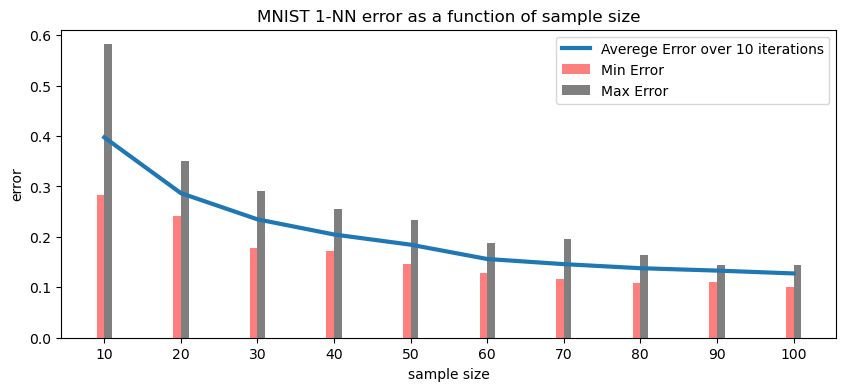

In [18]:
plt.figure(figsize = (10,4))
ax = plt.axes()
ax.set(xlabel="sample size", ylabel= "error",
       title="MNIST 1-NN error as a function of sample size",
       xticks=sample_size);

bar_width = 1
for i, min_err, max_err in zip(sample_size, min_errors, max_errors):
    plt.bar(i - bar_width/2, min_err, color='red', alpha=0.5, width=bar_width)
    plt.bar(i + bar_width/2, max_err, color='black',  alpha=0.5, width=bar_width)

plt.plot(sample_size, avg_errors, linewidth=3)
plt.legend(["Averege Error over 10 iterations", "Min Error", "Max Error"])
plt.show()


### Question 1.e

In [19]:
ks = [i for i in range(1,12)]
errors = [get_avg_err(200, k) for k in ks]

m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200
m=200


KeyboardInterrupt: 

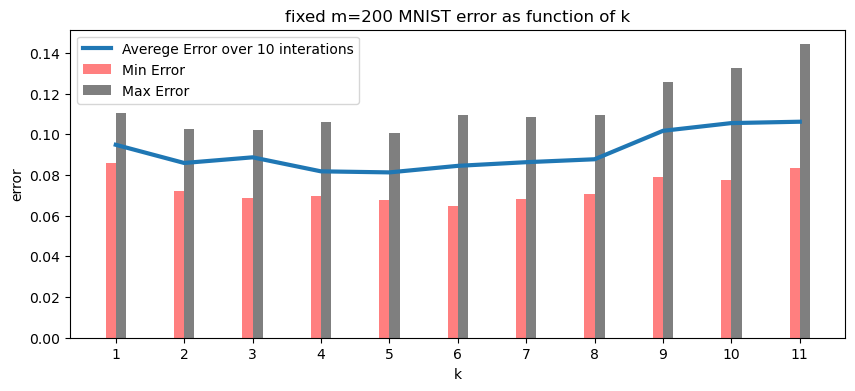

In [ ]:
min_err, max_err, avg_err = zip(*errors)

plt.figure(figsize = (10,4))
ax = plt.axes()
ax.set(xlabel="k", ylabel= "error",
    title="fixed m=200 MNIST error as function of k",
    xticks=ks);

# min/max error bars
bar_width = 0.15
for i, min_err, max_err in zip(ks, min_err, max_err):
    plt.bar(i - bar_width/2, min_err, color='red', alpha=0.5, width=bar_width)
    plt.bar(i + bar_width/2, max_err, color='black',  alpha=0.5, width=bar_width)

plt.plot(ks, avg_err, linewidth=3)
plt.legend(["Averege Error over 10 interations", "Min Error", "Max Error"], loc='best')
plt.show()

### Question 1.f

In [4]:
(X, Y) = gensmallm(train_sampels, labels, 100)

In [51]:
def corrupt(X, Y):
    labels = np.float64(labels)
    m = X.shape[0]
    prcnt = 0.15
    indices = [0,0]
    while len(indices) != len(np.unique(indices)):
        indices = np.random.randint(0, high=m, size=int(m * prcnt), dtype=int)
    
    for i in indices:
        curr_label = Y[i]
        Y[i] = np.random.choice([l for l in labels if l != curr_label])
    


    
